In [2]:
import pandas as pd
from darts import TimeSeries
from darts.models import AutoARIMA

In [3]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import scipy
from scipy import stats
import scipy.stats as scs
import itertools
from scipy.special import boxcox, inv_boxcox

In [209]:
data_path = ("../raw_data/data_ets.csv")
data = pd.read_csv(data_path)
data["timestamp"] = pd.to_datetime(data['timestamp'])

data.drop_duplicates(subset='timestamp', inplace=True)
data['timestamp'] = data.timestamp.dt.floor('D')

data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.000000,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.000000,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.10,-1,-3.57616,-3.20366,-1,42.489724,-1
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.000000,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.000000,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.10,-1,-3.96582,-3.57616,-1,40.644592,-1
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.000000,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.000000,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.10,-1,-3.88075,-3.96582,-1,42.484246,-1
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.000000,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.000000,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.10,-1,-4.04215,-3.88075,-1,35.386039,-1
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.000000,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.000000,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.10,-1,-4.32555,-4.04215,-1,27.897957,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2023-05-30,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,-369.136471,-0.509330,-1.085006,-9.299753,-10.271406,3.248127,52.988819,0.789931,70.605710,78.208334,-5.832009,54.405497,-29.394290,854.472960,0.0,0.0,6.169718,5.771043,0.938883,9.580562,4.339746,22.598952,16.782367,20.877398,76.0,-72.0,4.0,167.683289,-144.6950,1,-39.878962,17.566299,-57.445261,-139.463

In [98]:
data['timestamp'] = data.timestamp.dt.floor('D')
# data['timestamp'] = pd.to_datetime(data['timestamp'])

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1293
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1294 non-null   datetime64[ns]
 1   open                        1294 non-null   float64       
 2   high                        1294 non-null   float64       
 3   low                         1294 non-null   float64       
 4   close                       1294 non-null   float64       
 5   volume                      1294 non-null   float64       
 6   volume_CMF                  1294 non-null   float64       
 7   volume_FII                  1294 non-null   float64       
 8   volume_MFI                  1294 non-null   float64       
 9   volume_VWA                  1294 non-null   float64       
 10  mom_AOI                     1294 non-null   float64       
 11  mom_PPO                     1294 non-null   float64     

In [100]:
data.isnull().sum().sum()

0

In [101]:
#data=data.dropna()

In [102]:
data.duplicated().sum()

0

In [103]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.000000,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.000000,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.10,-1,-3.57616,-3.20366,-1,42.489724,-1
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.000000,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.000000,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.10,-1,-3.96582,-3.57616,-1,40.644592,-1
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.000000,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.000000,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.10,-1,-3.88075,-3.96582,-1,42.484246,-1
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.000000,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.000000,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.10,-1,-4.04215,-3.88075,-1,35.386039,-1
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.000000,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.000000,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.10,-1,-4.32555,-4.04215,-1,27.897957,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2023-05-30,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,-369.136471,-0.509330,-1.085006,-9.299753,-10.271406,3.248127,52.988819,0.789931,70.605710,78.208334,-5.832009,54.405497,-29.394290,854.472960,0.0,0.0,6.169718,5.771043,0.938883,9.580562,4.339746,22.598952,16.782367,20.877398,76.0,-72.0,4.0,167.683289,-144.6950,1,-39.878962,17.566299,-57.445261,-139.463

In [104]:
#data = data.drop_duplicates()

In [105]:
#had to remove duplicates
#series = TimeSeries.from_dataframe(data,"timestamp", "close", freq='H')

# TRAIN SPLIT

In [106]:
#train_size = 0.7
#index = round(train_size*data.shape[0])

#data_train = data.iloc[:index]
#data_test = data.iloc[index:]

In [107]:
#data_train.shape

In [108]:
#data_test.shape

In [109]:
#y_train=data_train[['timestamp', 'close']]
#X_train=data_train.drop(columns=['timestamp', 'close'])
#X_train

In [110]:
#y_train

In [111]:
#y_test=data_test[['timestamp', 'close']]
#X_test=data_test.drop(columns=['timestamp', 'close'])
#X_test

In [112]:
#y_test

# ETS(baseline)

In [113]:
from darts.models import ExponentialSmoothing

In [114]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.000000,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.000000,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.10,-1,-3.57616,-3.20366,-1,42.489724,-1
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.000000,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.000000,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.10,-1,-3.96582,-3.57616,-1,40.644592,-1
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.000000,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.000000,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.10,-1,-3.88075,-3.96582,-1,42.484246,-1
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.000000,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.000000,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.10,-1,-4.04215,-3.88075,-1,35.386039,-1
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.000000,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.000000,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.10,-1,-4.32555,-4.04215,-1,27.897957,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2023-05-30,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,-369.136471,-0.509330,-1.085006,-9.299753,-10.271406,3.248127,52.988819,0.789931,70.605710,78.208334,-5.832009,54.405497,-29.394290,854.472960,0.0,0.0,6.169718,5.771043,0.938883,9.580562,4.339746,22.598952,16.782367,20.877398,76.0,-72.0,4.0,167.683289,-144.6950,1,-39.878962,17.566299,-57.445261,-139.463

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1293
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   1294 non-null   datetime64[ns]
 1   open                        1294 non-null   float64       
 2   high                        1294 non-null   float64       
 3   low                         1294 non-null   float64       
 4   close                       1294 non-null   float64       
 5   volume                      1294 non-null   float64       
 6   volume_CMF                  1294 non-null   float64       
 7   volume_FII                  1294 non-null   float64       
 8   volume_MFI                  1294 non-null   float64       
 9   volume_VWA                  1294 non-null   float64       
 10  mom_AOI                     1294 non-null   float64       
 11  mom_PPO                     1294 non-null   float64     

In [116]:
#data.reset_index(inplace=True)

In [117]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.000000,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.000000,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.10,-1,-3.57616,-3.20366,-1,42.489724,-1
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.000000,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.000000,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.10,-1,-3.96582,-3.57616,-1,40.644592,-1
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.000000,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.000000,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.10,-1,-3.88075,-3.96582,-1,42.484246,-1
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.000000,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.000000,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.10,-1,-4.04215,-3.88075,-1,35.386039,-1
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.000000,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.000000,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.10,-1,-4.32555,-4.04215,-1,27.897957,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2023-05-30,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,-369.136471,-0.509330,-1.085006,-9.299753,-10.271406,3.248127,52.988819,0.789931,70.605710,78.208334,-5.832009,54.405497,-29.394290,854.472960,0.0,0.0,6.169718,5.771043,0.938883,9.580562,4.339746,22.598952,16.782367,20.877398,76.0,-72.0,4.0,167.683289,-144.6950,1,-39.878962,17.566299,-57.445261,-139.463

In [118]:
data['log_close'] = np.log(data['close'])

In [119]:
log_close = data['log_close']

In [120]:
series = TimeSeries.from_dataframe(data, 'timestamp', "close",freq='1D')

In [188]:
train_ets, val_ets = series.split_before(pd.Timestamp('2023-01-01'))

In [122]:
train_ets

<TimeSeries (DataArray) (timestamp: 1140, component: 1, sample: 1)>
array([[[ 8183.26]],

       [[ 8131.7 ]],

       [[ 8094.05]],

       ...,

       [[16630.3 ]],

       [[16601.2 ]],

       [[16537.6 ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2019-11-18 2019-11-19 ... 2022-12-31
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [123]:
data['timestamp'].duplicated().sum()

0

In [124]:
model_ESP = ExponentialSmoothing()
model_ESP.fit(train_ets)
prediction = model_ESP.predict(1)#,num_samples=1000)

In [125]:
prediction

<TimeSeries (DataArray) (timestamp: 1, component: 1, sample: 1)>
array([[[16488.28811537]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2023-01-01
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

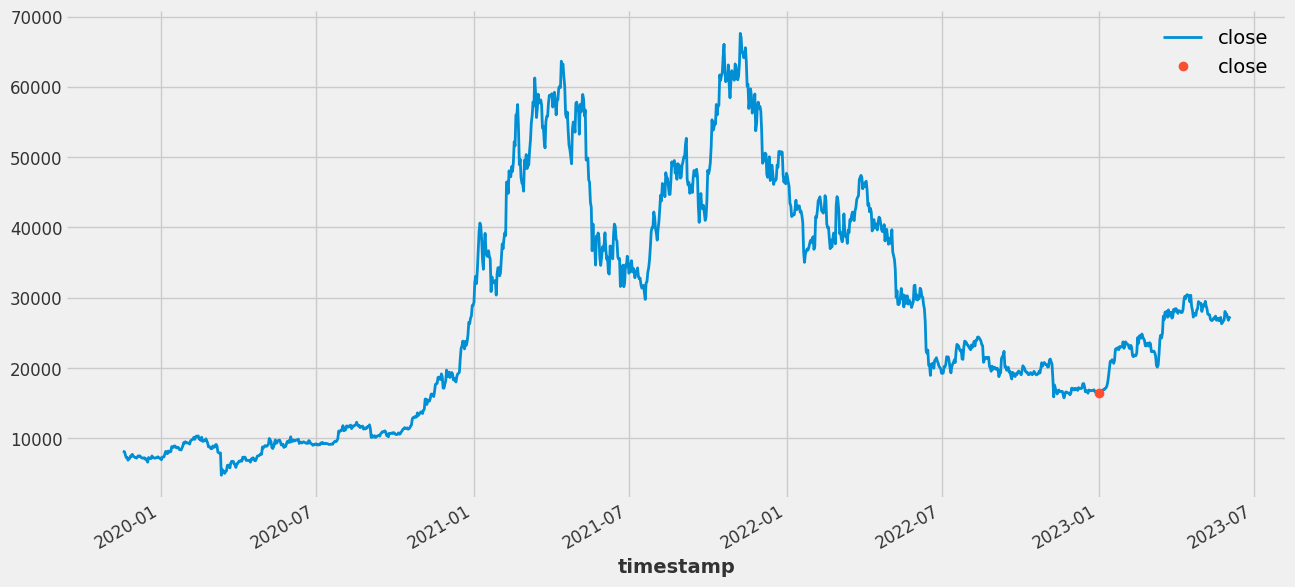

In [126]:
series[:1300].plot()
prediction.plot()

In [127]:
len(train_ets)

1140

In [128]:
prediction = model_ESP.predict(len(val_ets))

In [129]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train_ets)
anom_score = scorer.score(val_ets)

In [130]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train_ets))
binary_anom = detector.detect(anom_score)

In [131]:
import matplotlib.pyplot as plt

#series.plot()
#(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
#(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [132]:
from darts.metrics import mape

In [133]:
score=mape(val_ets,prediction)

In [134]:
score

23.93523505906895

In [135]:
from darts.metrics import mase

In [136]:
score1=mase(val_ets,prediction,train_ets)

In [137]:
score1

8.17447730279086

In [138]:
model = ExponentialSmoothing()

backtest = model.historical_forecasts(series,start=0.8, forecast_horizon=1)

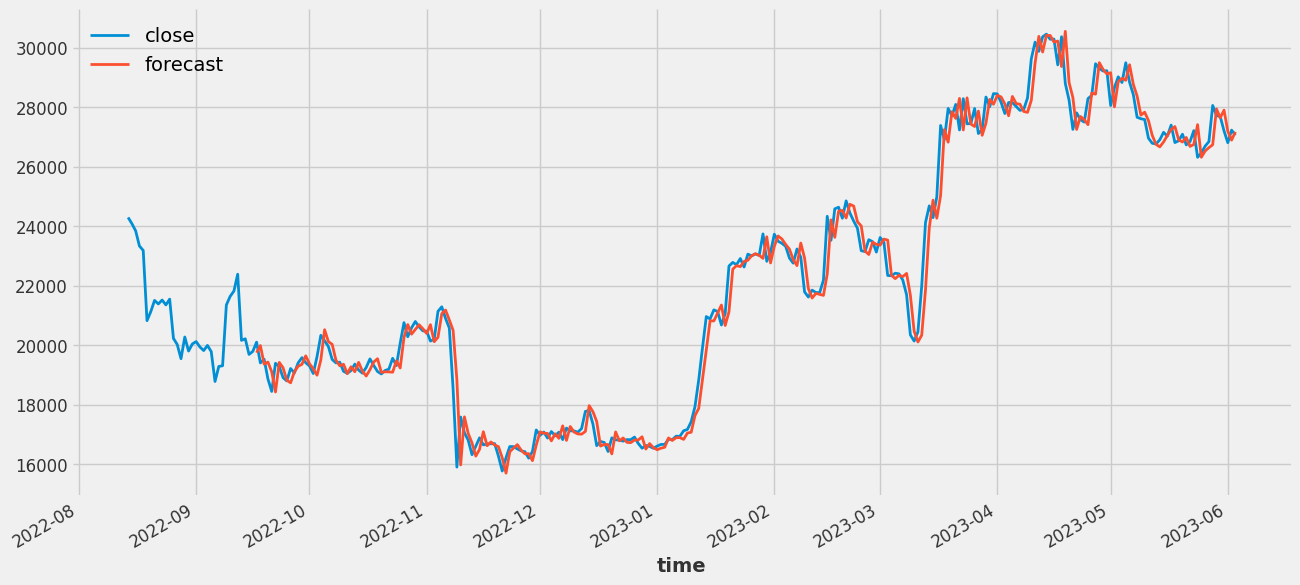

In [139]:
series[1000:].plot()
backtest.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [140]:
backtest.time_index

DatetimeIndex(['2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26',
               ...
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03'], dtype='datetime64[ns]', name='time', length=260, freq='D')

In [141]:
data.head()

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity,log_close
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.0,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.0,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.1,-1,-3.57616,-3.20366,-1,42.489724,-1,9.009846
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.0,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.0,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.1,-1,-3.96582,-3.57616,-1,40.644592,-1,9.003525
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.0,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.0,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.1,-1,-3.88075,-3.96582,-1,42.484246,-1,8.998885
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.0,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.0,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.1,-1,-4.04215,-3.88075,-1,35.386039,-1,8.938781
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.0,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.0,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.1,-1,-4.32555,-4.04215,-1,27.897957,-1,8.890510


In [155]:
data.reset_index(inplace=True, drop=True)

In [143]:
real = data[data['timestamp']>='2022-09-04'][['timestamp','close']]
#data['timestamp']>='2022-09-04'

In [144]:
real

,timestamp,close
1021,2022-09-04,19992.7
1022,2022-09-05,19784.9
1023,2022-09-06,18781.5
1024,2022-09-07,19287.0
1025,2022-09-08,19309.3
...,...,...
1289,2023-05-30,27680.1
1290,2023-05-31,27201.1
1291,2023-06-01,26805.3
1292,2023-06-02,27227.8


In [145]:
real_series = TimeSeries.from_dataframe(real, 'timestamp', "close",freq='1D')

In [146]:
real_series

<TimeSeries (DataArray) (timestamp: 273, component: 1, sample: 1)>
array([[[19992.7]],

       [[19784.9]],

       [[18781.5]],

       [[19287. ]],

       [[19309.3]],

       [[21352. ]],

       [[21639.5]],

       [[21820.3]],

       [[22386. ]],

       [[20162.5]],

...

       [[26461.8]],

       [[26689.9]],

       [[26841.6]],

       [[28055.7]],

       [[27722. ]],

       [[27680.1]],

       [[27201.1]],

       [[26805.3]],

       [[27227.8]],

       [[27054.9]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 2022-09-04 2022-09-05 ... 2023-06-03
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [147]:
score=mape(real_series,backtest)

In [148]:
score

1.8001052062637495

In [149]:
backtest

<TimeSeries (DataArray) (time: 260, component: 1, sample: 1)>
array([[[19746.61686533]],

       [[19988.57722803]],

       [[19364.45868459]],

       [[19432.45193679]],

       [[19110.9618932 ]],

       [[18429.34290099]],

       [[19423.35390269]],

       [[19241.05342666]],

       [[18825.034359  ]],

       [[18737.1266758 ]],

...

       [[26315.10161805]],

       [[26526.2954564 ]],

       [[26639.02357716]],

       [[26735.43652055]],

       [[27939.54524319]],

       [[27642.90332953]],

       [[27899.25677328]],

       [[27186.47601007]],

       [[26891.14160328]],

       [[27170.00107628]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-17 2022-09-18 ... 2023-06-03
  * component  (component) object 'close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [150]:
forecast1 = model_ESP.predict(1)

In [151]:
print("model {} obtains MAPE: {:.2f}%".format(model_ESP, mape(val_ets[0], forecast1)))

model ExponentialSmoothing() obtains MAPE: 0.73%


In [163]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
0,2019-11-18 03:00:00,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.000000,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.000000,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.10,-1,-3.57616,-3.20366,-1,42.489724,-1
1,2019-11-19 03:00:00,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.000000,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.000000,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.10,-1,-3.96582,-3.57616,-1,40.644592,-1
2,2019-11-20 03:00:00,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.000000,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.000000,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.10,-1,-3.88075,-3.96582,-1,42.484246,-1
3,2019-11-21 03:00:00,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.000000,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.000000,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.10,-1,-4.04215,-3.88075,-1,35.386039,-1
4,2019-11-22 03:00:00,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.000000,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.000000,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.10,-1,-4.32555,-4.04215,-1,27.897957,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2023-05-30 03:00:00,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,-369.136471,-0.509330,-1.085006,-9.299753,-10.271406,3.248127,52.988819,0.789931,70.605710,78.208334,-5.832009,54.405497,-29.394290,854.472960,0.0,0.0,6.169718,5.771043,0.938883,9.580562,4.339746,22.598952,16.782367,20.877398,76.0,-72.0,4.0,167.68328

In [153]:
forecasts_list = []
# define a for loop for slicing the train set and make forecasts

for v in range(len(val_ets)):
    model= ExponentialSmoothing()
    
    while v>=1 and v<len(val_ets):
        train_ets =train_ets.append(val_ets[0])
        val_ets=val_ets[1:]
        model.fit(train_ets)
        pred = model.predict(1)
        yr = pred.time_index[0].year
        mnth = pred.time_index[0].month
        day = pred.time_index[0].day
        full = f'{yr}-{mnth}-{day}'
       
        forecasts_list.append((pred.values()[0][0], full))
    
    if v % 10 == 0:
        print(f'completed {v} timesteps')
print(forecasts_list)

completed 0 lines
completed 10 lines
completed 20 lines
completed 30 lines
completed 40 lines
completed 50 lines
completed 60 lines
completed 70 lines
completed 80 lines
completed 90 lines
completed 100 lines
completed 110 lines
completed 120 lines
completed 130 lines
completed 140 lines
completed 150 lines
[(16539.674161854848, '2023-1-2'), (16571.260964495516, '2023-1-3'), (16883.810017998792, '2023-1-4'), (16799.579425276504, '2023-1-5'), (16891.91980657826, '2023-1-6'), (16896.32700189984, '2023-1-7'), (16835.51967433082, '2023-1-8'), (17049.366082495086, '2023-1-9'), (17075.255403532214, '2023-1-10'), (17635.080410522198, '2023-1-11'), (17879.48380673222, '2023-1-12'), (18868.61996307302, '2023-1-13'), (19836.51858483011, '2023-1-14'), (20818.415781755844, '2023-1-15'), (20816.80721943362, '2023-1-16'), (21084.148630008578, '2023-1-17'), (21349.932934422042, '2023-1-18'), (20663.30170320232, '2023-1-19'), (21121.498332281986, '2023-1-20'), (22554.168635660993, '2023-1-21'), (22673

In [70]:
values = [x[0] for x in forecasts_list]
dates = [x[1] for x in forecasts_list]
df = pd.DataFrame({'predictions':values, 'timestamp': dates})
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [71]:
df

,predictions,timestamp
0,16539.674162,2023-01-02
1,16571.260964,2023-01-03
2,16883.810018,2023-01-04
3,16799.579425,2023-01-05
4,16891.919807,2023-01-06
...,...,...
148,27642.903330,2023-05-30
149,27899.256773,2023-05-31
150,27186.476010,2023-06-01
151,26891.141603,2023-06-02


Choosing the model for forecasting

Gridsearch best model.best params

In [72]:
#df.set_index('timestamp', inplace= True)

In [80]:
df

,predictions,timestamp
0,16539.674162,2023-01-02
1,16571.260964,2023-01-03
2,16883.810018,2023-01-04
3,16799.579425,2023-01-05
4,16891.919807,2023-01-06
...,...,...
148,27642.903330,2023-05-30
149,27899.256773,2023-05-31
150,27186.476010,2023-06-01
151,26891.141603,2023-06-02


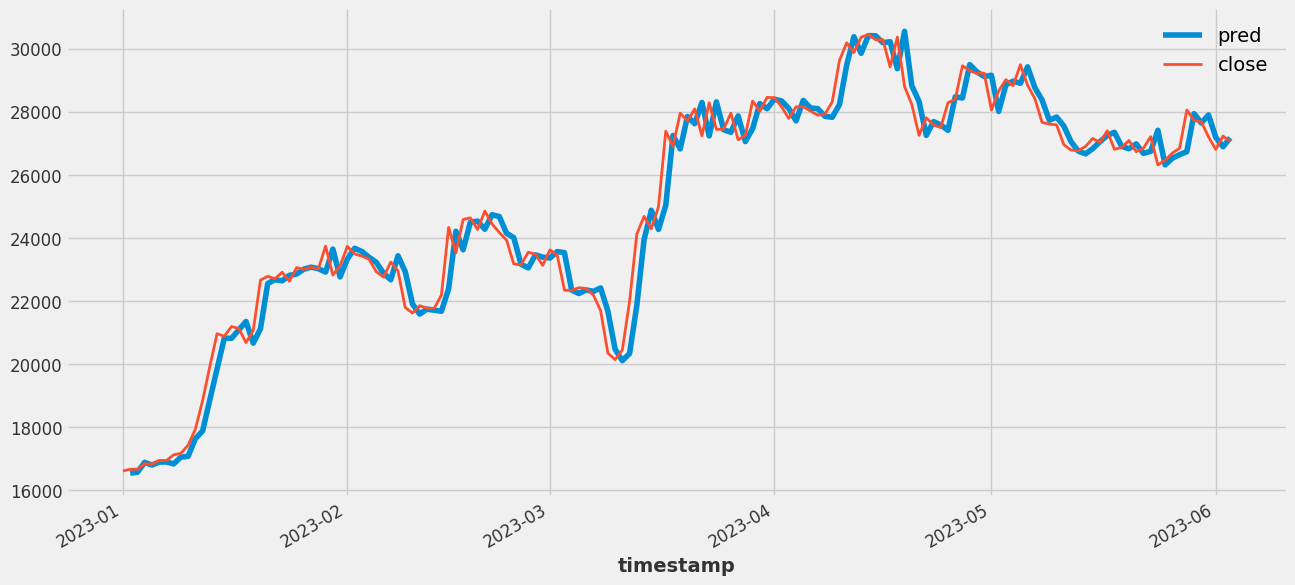

In [85]:
plt.plot(df['timestamp'], df['predictions'], label='pred')
val_ets.plot()

In [86]:
columns_to_keep = ['timestamp', 'open','high','low','close', 'volat_ATR']
df_simple = data[columns_to_keep]

In [87]:
df_simple

,timestamp,open,high,low,close,volat_ATR
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,367.080968
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,356.065899
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,344.382620
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,369.748862
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,414.931086
...,...,...,...,...,...,...
1289,2023-05-30,27722.10,28038.60,27530.00,27680.10,854.472960
1290,2023-05-31,27680.00,27825.00,26826.00,27201.10,864.796320
1291,2023-06-01,27201.10,27347.90,26600.00,26805.30,856.446583
1292,2023-06-02,26805.30,27290.00,26477.60,27227.80,853.300398


In [88]:
df

,predictions,timestamp
0,16539.674162,2023-01-02
1,16571.260964,2023-01-03
2,16883.810018,2023-01-04
3,16799.579425,2023-01-05
4,16891.919807,2023-01-06
...,...,...
148,27642.903330,2023-05-30
149,27899.256773,2023-05-31
150,27186.476010,2023-06-01
151,26891.141603,2023-06-02


In [89]:
merged_df = df_simple.merge(df,on='timestamp')

In [90]:
merged_df

,timestamp,open,high,low,close,volat_ATR,predictions
0,2023-01-02,16610.4,16799.0,16541.2,16666.0,348.494688,16539.674162
1,2023-01-03,16665.9,16774.0,16600.3,16667.2,336.009353,16571.260964
2,2023-01-04,16667.3,16984.6,16645.7,16842.1,336.215828,16883.810018
3,2023-01-05,16842.2,16872.8,16740.4,16823.8,321.657555,16799.579425
4,2023-01-06,16823.8,17030.0,16664.8,16943.8,324.767729,16891.919807
...,...,...,...,...,...,...,...
148,2023-05-30,27722.1,28038.6,27530.0,27680.1,854.472960,27642.903330
149,2023-05-31,27680.0,27825.0,26826.0,27201.1,864.796320,27899.256773
150,2023-06-01,27201.1,27347.9,26600.0,26805.3,856.446583,27186.476010
151,2023-06-02,26805.3,27290.0,26477.6,27227.8,853.300398,26891.141603


In [91]:
merged_df.to_csv('final_merged_data_ETS_model.csv')

# ARIMA

In [92]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [164]:
#data.set_index('timestamp',inplace=True)

In [202]:
data

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,mom_AOI,mom_PPO,mom_PPO_signal,mom_PVO,mom_PVO_signal,mom_ROC,mom_rsi,mom_stoch_RSI,mom_StochOscillator,mom_StochOscillator_signal,mom_TSI,mom_UltimateOscillator,mom_WilliamsRIndicator,volat_ATR,volat_bol_hband_binary,volat_bol_lband_binary,volat_bol_band_width,KCW,KCP,donch_DCW,ULI,ADX,ADX_neg,ADX_pos,ARI_down,ARI,ARI_up,CCI,DPO,EMA_100_binary,KST,KST_diff,KST_sig,MACD_line,MACD_signal,MAI,PSAR_binary,STC,TRIX,vortex_ind_diff,vortex_neg,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity,deseasonalized,linearized
0,2019-11-18 03:00:00,8504.13,8504.71,8050.00,8183.26,123477.142,-0.104728,-1.002885e+07,22.495083,8804.605053,-209.311559,-1.052507,0.114085,1.756674,3.002101,-12.418554,37.111115,0.000000,9.470340,10.459149,-7.060205,42.772716,-90.529660,367.080968,0.0,1.0,15.402653,7.153286,-0.682007,13.149521,7.505632,21.611952,26.051474,18.520206,100.0,-88.0,12.0,-159.224466,292.3425,0,20.747606,-54.459962,75.207569,-92.004023,10.565019,24.726535,0,0.000000,0.072186,-0.491226,1.242056,0.750830,3122.03,1.75,2.10,-1,-3.57616,-3.20366,-1,42.489724,-1,8205.671859,9.012581
1,2019-11-19 03:00:00,8183.30,8212.87,8000.00,8131.70,110854.030,-0.082149,-9.412672e+06,22.805467,8703.631571,-327.861176,-1.454508,-0.199634,2.956114,2.992903,-11.800244,36.251494,0.000000,9.082759,10.322632,-9.938554,40.484788,-90.917241,356.065899,0.0,0.0,17.120631,6.937509,-0.722836,13.836502,8.244403,21.411530,25.942006,17.729180,100.0,-92.0,8.0,-162.962121,-100.5875,0,7.291183,-55.605920,62.897103,-126.487596,-16.845504,24.133063,0,0.000000,0.024964,-0.568271,1.293565,0.725293,3120.18,1.75,2.10,-1,-3.96582,-3.57616,-1,40.644592,-1,8135.936183,9.004046
2,2019-11-20 03:00:00,8131.12,8230.00,8037.50,8094.05,87352.380,-0.094638,-8.537836e+06,22.935726,8630.081925,-420.241618,-1.792337,-0.518174,1.908151,2.775953,-7.760429,35.602970,0.000000,6.805699,8.452933,-12.531922,39.422181,-93.194301,344.382620,0.0,0.0,18.599617,6.624357,-0.762612,12.646228,8.850635,21.154103,24.906029,17.376540,100.0,-96.0,4.0,-142.251946,-11.6700,0,-7.684776,-57.761131,50.076355,-155.066605,-44.489724,23.265711,0,0.000000,-0.023234,-0.575880,1.287707,0.711826,3108.46,1.75,2.10,-1,-3.88075,-3.96582,-1,42.484246,-1,8095.246578,8.999032
3,2019-11-21 03:00:00,8094.57,8131.51,7432.00,7621.90,180289.189,-0.158622,-1.947865e+07,21.665435,8485.386933,-556.065353,-2.487997,-0.912139,8.371686,3.895099,-13.497103,28.675034,0.000000,10.392382,8.760280,-17.248733,37.450904,-89.607618,369.748862,0.0,1.0,21.732704,7.215794,-1.300353,17.401203,9.755254,22.338069,33.238964,15.028011,100.0,-92.0,8.0,-187.240598,298.9455,0,-23.378799,-59.670422,36.291623,-213.354814,-78.262742,22.884701,0,0.000000,-0.080508,-0.625831,1.268953,0.643122,3103.54,1.75,2.10,-1,-4.04215,-3.88075,-1,35.386039,-1,7613.331186,8.937656
4,2019-11-22 03:00:00,7621.89,7765.03,6762.73,7262.72,371213.951,-0.137581,-3.574350e+07,19.524014,8174.860227,-780.895294,-3.364460,-1.402603,23.843811,7.884842,-19.671817,24.732288,0.000000,20.624353,12.607478,-22.801379,41.959931,-79.375647,414.931086,0.0,1.0,25.771449,8.249713,-1.454371,25.253042,10.875997,24.433416,39.025865,12.434690,100.0,-96.0,4.0,-218.014163,87.8195,0,-44.142931,-65.243203,21.100273,-285.243355,-119.658865,22.904342,0,0.000000,-0.149332,-0.671938,1.295190,0.623252,3110.29,1.75,2.10,-1,-4.32555,-4.04215,-1,27.897957,-1,7246.240230,8.888238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2023-05-30 03:00:00,27722.10,28038.60,27530.00,27680.10,334379.313,0.035793,1.970887e+07,53.201891,27036.666041,-369.136471,-0.509330,-1.085006,-9.299753,-10.271406,3.248127,52.988819,0.789931,70.605710,78.208334,-5.832009,

In [166]:
type(data.index)

pandas.core.indexes.numeric.Int64Index

Multiplicative Decomposition 

In [167]:
#indexed_data=data[:1000]

In [168]:
#indexed_data

In [169]:
result_mul = seasonal_decompose(data['close'], model='multiplicative',period=5)

In [170]:
#Removing seasons
data['deseasonalized'] = data.close.values/result_mul.seasonal

In [171]:
#plt.figure(figsize=(15,4)); plt.subplot(1,2,1); plt.plot(data.deseasonalized);
#plt.title('close price lin', fontsize=16);

In [172]:
#Removing trend
data['linearized'] = np.log(data['deseasonalized'])

In [173]:
#plt.subplot(1,2,2); plt.plot(data['linearized'])
#plt.title('close price lin', fontsize=16);

In [174]:
# 1st Differencing
y_diff = data['linearized'].diff().dropna()

# 2nd Differencing
y_diff_diff = data['linearized'].diff().diff().dropna()

In [175]:
print('p-value zero-diff: ', adfuller(data['linearized'])[1])
print('p-value first-diff: ', adfuller(data['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(data['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.40983866054888834
p-value first-diff:  1.1288863212184484e-29
p-value second-diff:  6.288576218057568e-23


In [176]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['linearized'])

1

In [ ]:
train_arima = data['linearized'][0:955]
val_arima = data['linearized'][955:]

In [178]:
arima = ARIMA(data['linearized'], order=(0, 1, 0), trend='t')
arima = arima.fit()

In [179]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                 1294
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2390.848
Date:                Tue, 13 Jun 2023   AIC                          -4777.695
Time:                        15:03:24   BIC                          -4767.366
Sample:                             0   HQIC                         -4773.818
                               - 1294                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0009      0.001      0.813      0.416      -0.001       0.003
sigma2         0.0014   1.63e-05     88.722      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   8.83   Jarque-Bera (JB):             36107.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

parameters

In [180]:
aarima_model = AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=1,
    d=1,
    seasonal=False,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

aarima_model.fit(train_ets)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21995.438, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21993.192, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21993.435, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21993.453, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21991.387, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.531 seconds


AutoARIMA(add_encoders=None, start_p=1, start_q=1, max_p=5, max_q=5, m=1, d=1, seasonal=False, start_P=0, D=None, trace=True, error_action=ignore, suppress_warnings=True, stepwise=True)

In [181]:
aarima_model.model_params

OrderedDict([('add_encoders', None),
             ('start_p', 1),
             ('start_q', 1),
             ('max_p', 5),
             ('max_q', 5),
             ('m', 1),
             ('d', 1),
             ('seasonal', False),
             ('start_P', 0),
             ('D', None),
             ('trace', True),
             ('error_action', 'ignore'),
             ('suppress_warnings', True),
             ('stepwise', True)])

In [ ]:
data['linearized']

In [ ]:
#prediction = aarima_model.predict(len(val))

In [ ]:
forecast_1 = aarima_model.predict(1)

In [ ]:
val_ets

In [ ]:
forecast_1

In [ ]:
print("model {} obtains MAPE: {:.2f}%".format(aarima_model, mape(val_ets[0], forecast_1)))

In [ ]:
backtest1 = aarima_model.historical_forecasts(series,start=0.8, forecast_horizon=1)

In [ ]:
df1

In [ ]:
df1.set_index('timestamp', inplace= True)

In [ ]:
merged_df = df_simple.merge(df,on='timestamp')

In [ ]:
series[1000:].plot()
backtest1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
backtest1.time_index

In [ ]:
# Building model
arima = ARIMA(train_arima, order=(0, 1, 0), trend='t')  
arima = arima.fit()


forecast = arima.forecast(len(val_arima), alpha=0.05)  # 95% confidence


forecast_results = arima.get_forecast(len(val_arima), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

In [ ]:
#recomposition back to timeseries
forecast_recons = np.exp(forecast) * result_mul.seasonal[955:]
train_recons = np.exp(train_arima) * result_mul.seasonal[0:955]
val_recons = np.exp(val_arima) * result_mul.seasonal[955:]
lower_recons = np.exp(confidence_int)[:, 0] * result_mul.seasonal[955:]
upper_recons = np.exp(confidence_int)[:, 1] * result_mul.seasonal[955:]

In [ ]:
lower_recons

In [ ]:
#residuals = pd.DataFrame(arima.resid)

In [ ]:
backtest1

In [ ]:
score=mape(real_series,backtest1)

In [ ]:
score

In [183]:
forecasts_list1 = []
# define a for loop for slicing the train set and make forecasts

for v in range(len(val_ets)):
    model= AutoARIMA(start_p=1, start_q=1,
        max_p=5, max_q=5,
        m=1,
        d=1,
        seasonal=False,
        start_P=0,
        D=None,
        trace=True,
        error_action='ignore',
        suppress_warnings=True, stepwise=True
    )

    while v>=1 and v<len(val_ets):
        train_ets =train_ets.append(val_ets[0])
        val_ets=val_ets[1:]
        model.fit(train_ets)
        pred = model.predict(1)
        yr = pred.time_index[0].year
        mnth = pred.time_index[0].month
        day = pred.time_index[0].day
        full = f'{yr}-{mnth}-{day}'
       
        forecasts_list1.append((pred.values()[0][0], full))
print(forecasts_list1)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19513.315, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19510.995, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19511.310, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19511.316, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19509.035, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.639 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19529.426, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19527.108, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19527.421, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19527.427, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19525.148, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.507 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19545

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19803.336, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19803.743, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19803.753, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19801.428, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.509 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19823.478, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19821.036, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19821.472, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19821.481, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19819.152, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.631 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19839.592, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19837.141, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20096.552, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20094.284, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.441 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20114.768, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20112.391, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20112.763, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20112.771, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20110.516, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.491 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20130.900, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20128.530, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20128.895, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20128.902, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20390.017, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.443 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20410.272, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20407.969, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20408.266, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20408.276, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20406.092, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.438 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20426.442, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20424.141, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20424.436, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20424.446, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20422.271, Time=0.02 sec

Best model:  ARIMA(0,1

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20707.313, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20704.749, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20705.308, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20705.316, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20702.891, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.434 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20723.679, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20721.129, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20721.674, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20721.683, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20719.284, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.390 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20743.567, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21002.340, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21002.722, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21002.735, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21000.557, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.445 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21020.892, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21018.500, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21018.887, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21018.899, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21016.708, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.475 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21037.024, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21034.640, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21296.552, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21294.408, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.476 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21315.283, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21312.903, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21313.279, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21313.295, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21311.100, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.437 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21331.500, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21329.146, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21329.496, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21329.512, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21605.503, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21605.808, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21605.826, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21603.706, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.468 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21623.847, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21621.539, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21621.844, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21621.862, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21619.742, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.445 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21640.164, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21637.855, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21895.856, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21893.769, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.497 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21914.866, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21912.599, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21912.863, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21912.881, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21910.811, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.471 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21930.952, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21928.705, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21928.948, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21928.967, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]

In [203]:
values = [x[0] for x in forecasts_list1]
dates = [x[1] for x in forecasts_list1]
df1 = pd.DataFrame({'predictions':values, 'timestamp': dates})
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [204]:
df1

,predictions,timestamp
0,16610.3,2023-01-02
1,16666.0,2023-01-03
2,16667.2,2023-01-04
3,16842.1,2023-01-05
4,16823.8,2023-01-06
...,...,...
148,27722.0,2023-05-30
149,27680.1,2023-05-31
150,27201.1,2023-06-01
151,26805.3,2023-06-02


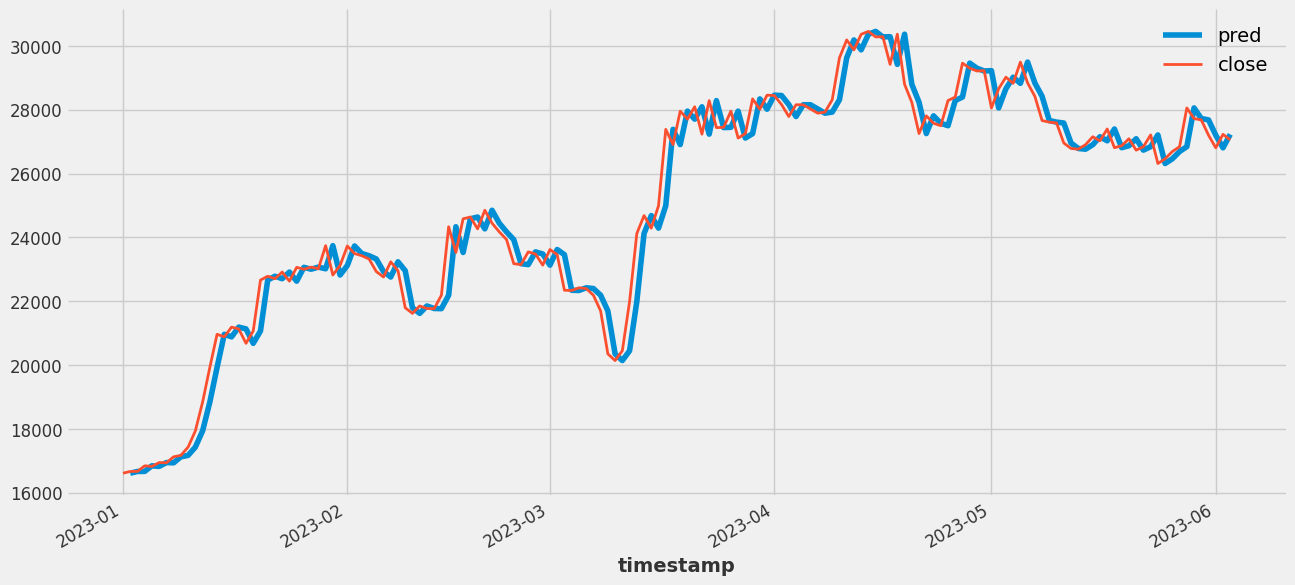

In [197]:
plt.plot(df1['timestamp'], df1['predictions'], label='pred')
val_ets.plot()

In [210]:
columns_to_keep1 = ['timestamp', 'open','high','low','close', 'volat_ATR']
df1_simple = data[columns_to_keep1]

In [211]:
df1_simple

,timestamp,open,high,low,close,volat_ATR
0,2019-11-18,8504.13,8504.71,8050.00,8183.26,367.080968
1,2019-11-19,8183.30,8212.87,8000.00,8131.70,356.065899
2,2019-11-20,8131.12,8230.00,8037.50,8094.05,344.382620
3,2019-11-21,8094.57,8131.51,7432.00,7621.90,369.748862
4,2019-11-22,7621.89,7765.03,6762.73,7262.72,414.931086
...,...,...,...,...,...,...
1289,2023-05-30,27722.10,28038.60,27530.00,27680.10,854.472960
1290,2023-05-31,27680.00,27825.00,26826.00,27201.10,864.796320
1291,2023-06-01,27201.10,27347.90,26600.00,26805.30,856.446583
1292,2023-06-02,26805.30,27290.00,26477.60,27227.80,853.300398


In [212]:
merged_df1 = df1_simple.merge(df1,on='timestamp')

In [213]:
merged_df1

,timestamp,open,high,low,close,volat_ATR,predictions
0,2023-01-02,16610.4,16799.0,16541.2,16666.0,348.494688,16610.3
1,2023-01-03,16665.9,16774.0,16600.3,16667.2,336.009353,16666.0
2,2023-01-04,16667.3,16984.6,16645.7,16842.1,336.215828,16667.2
3,2023-01-05,16842.2,16872.8,16740.4,16823.8,321.657555,16842.1
4,2023-01-06,16823.8,17030.0,16664.8,16943.8,324.767729,16823.8
...,...,...,...,...,...,...,...
148,2023-05-30,27722.1,28038.6,27530.0,27680.1,854.472960,27722.0
149,2023-05-31,27680.0,27825.0,26826.0,27201.1,864.796320,27680.1
150,2023-06-01,27201.1,27347.9,26600.0,26805.3,856.446583,27201.1
151,2023-06-02,26805.3,27290.0,26477.6,27227.8,853.300398,26805.3


In [214]:
merged_df1.to_csv('arima_merged_data_model.csv')

# SARIMA

Train split

In [ ]:
data['log'] = np.log(data.close)

In [ ]:
train_ets

In [ ]:
val_ets

In [ ]:
fore_2_ts

In [ ]:
aarima_model_2 = AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=12,
    d=1,
    seasonal=False,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

aarima_model_2.fit(train_ets)

In [ ]:
aarima_model_2.model_params

In [ ]:
forecast_2 = aarima_model_2.predict(2)

In [ ]:
forecast_2

In [ ]:
print("model {} obtains MAPE: {:.2f}%".format(aarima_model_2, mape(val_ets[0], forecast_2)))

In [ ]:
#forecast_recons = pd.Series(np.exp(forecast), index=val_arima.index)
#lower_recons = np.exp(confidence_int['lower log']).values
#upper_recons = np.exp(confidence_int['upper log']).values

In [ ]:
#forecast_data= data[data['timestamp']>='2022-09-04'][['timestamp','close']]

In [ ]:
#forecast_2_series = TimeSeries.from_dataframe(forecast_data, 'timestamp', "close",freq='1D')

In [ ]:
#forecast_2_series

In [ ]:
#forecast_2_series= pd.DataFrame(smodel.predict(1))

In [ ]:
#np.array(forecast_2_series)

In [ ]:
#fore_2_ts=TimeSeries.from_dataframe(forecast_2_series)

In [ ]:
#fore_2_ts

In [ ]:
# val.reset_index(drop=True,inplace = True)

In [ ]:
forecasts_list2 = []
# define a for loop for slicing the train set and make forecasts

for v in range(len(val_ets)):
    model=AutoARIMA(
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    m=12,
    d=1,
    seasonal=True,
    start_P=0,
    D=None,
    trace=True,
    error_action='ignore',
    suppress_warnings=True, stepwise=True
)

    while v>=1 and v<len(val_ets):
        train_ets =train_ets.append(val_ets[0])
        val_ets=val_ets[1:]
        model.fit(train_ets)
        pred = model.predict(1)
        yr = pred.time_index[0].year
        mnth = pred.time_index[0].month
        day = pred.time_index[0].day
        full = f'{yr}-{mnth}-{day}'
       
        forecasts_list2.append((pred.values()[0][0], full))
print(forecasts_list2)

In [ ]:
values = [x[0] for x in forecasts_list2]
dates = [x[1] for x in forecasts_list2]
df2 = pd.DataFrame({'predictions':values, 'timestamp': dates})
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [ ]:
df2

# PROPHET

In [ ]:
df = data.reset_index().rename(columns={'timestamp': 'ds', 'close':'y'})
df.head()

In [ ]:
from prophet import Prophet

train_fb = df.iloc[:955]
val_fb = df.iloc[955:]

model_fb = Prophet(seasonality_mode='multiplicative')

model_fb.fit(train_fb)

In [ ]:
forecast_val = model_fb.predict(val_fb)
forecast_val.head()

In [ ]:
model_fb.plot(forecast_val);

In [ ]:
# Predict the next 50 datapoints
future = model_fb.make_future_dataframe(periods=50, freq='1h')
forecast_future = model_fb.predict(future)
forecast_future.head()

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

initial = f'{5 * 365} days' 
period = f'{5 * 365} days'
horizon = '365 days'
df_cv = cross_validation(model_fb, initial=initial, period=period, horizon=horizon)

In [ ]:
forecast_3 = model_fb.predict(1)